In [7]:
import RunFullMap
import numpy as np
import scipy.linalg
import keras.backend as K
import tensorflow as tf
import sklearn.manifold
import sklearn.metrics

import Diffusion as df
import os.path
from autoencoder import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from keras.utils import np_utils
from keras.layers import Dense, Input
from keras.models import Model
from keras import regularizers

from polynomialcurve import PolynomialPointCurve
import LaplacianEigenmaps




In [8]:
# n = 3000
# t = 2.01*np.pi*np.random.uniform(0,1,n)
# x = np.cos(t)
# y = np.sin(2*t)
# z = np.sin(3*t)
# orig_data = np.vstack([x,y,z])
# orig_data = np.transpose(orig_data)

# TRAIN_SAMPLES = 2000

# train_data = orig_data[:TRAIN_SAMPLES]
# eval_data = orig_data[TRAIN_SAMPLES:]

# pred_net = RunFullMap.DiffusionNet(train_data, 2, embedding='laplacian')

In [9]:
# res = pred_net.predict(eval_data)
# fig = plt.figure(figsize=(10,5))
# #a1 = fig.add_subplot(121)
# #a1.scatter(z_test[:,0], z_test[:,1],c=t_test, cmap='gist_ncar')
# #a1.set_aspect('equal')
# #a1.set_title('eta=' +str(eta))

# a2 = fig.add_subplot(122,projection='3d')
# a2.scatter(eval_data[:,0], eval_data[:,1], eval_data[:,2], color='blue')
# print(eval_data.shape)
# print(res.shape)
# a2.scatter(res[:,0], res[:,1], res[:,2], color='red', zorder=10)
# #a2.set_title('eta=' +str(eta))
# a2.set_aspect('equal')
# plt.show()

In [10]:
polycurve = PolynomialPointCurve(dimension=3, avg_dims_per_term=1, avg_power_per_dim=2, num_terms=3, avg_mono_term_power=1, max_coeff=2)
polycurve.compute_threshold(.001)

0.043813402284412106

Gpu available:  True
Done embedding
Done encoder
Done decoder
Train: Original error 0.0006320350750299517 , Test error 1.1044977309771085
Test: Original error 0.000635091018688922 , Test error 1.1044977309771085
Gpu available:  True
Using laplacian embedding
Done embedding
Done encoder
Done decoder
Train: Original error 0.0006320350750299517 , Test error 1.1281805482529788
Test: Original error 0.000635091018688922 , Test error 1.1281805482529788


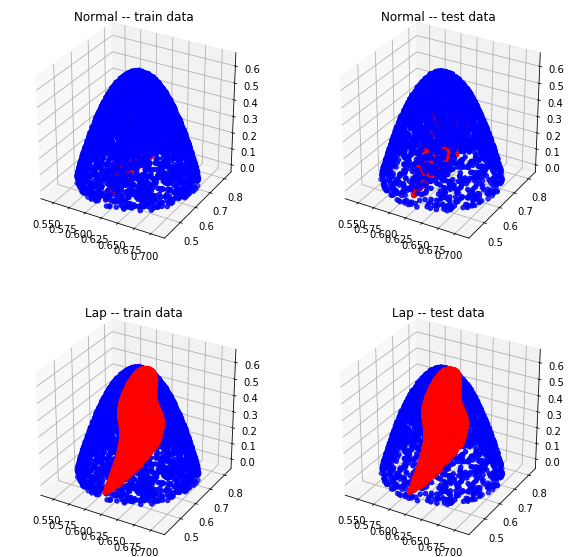

In [11]:
data = polycurve.gen_noisy_points(8000)
fig = plt.figure(figsize=(10,10))

T_THRESH = 5000
train = data[:T_THRESH]
test = data[T_THRESH:]
pred_net = RunFullMap.DiffusionNet(train, 2, embedding='normal', visual=False)
train_pred = pred_net.predict(train)
test_pred = pred_net.predict(test)
a1 = fig.add_subplot(221, projection='3d')
a1.scatter(train[:,0], train[:,1],train[:,2], color='blue')
a1.scatter(train_pred[:,0], train_pred[:,1],train_pred[:,2], color='red')
a1.set_title('Normal -- train data')
a2 = fig.add_subplot(222, projection='3d')
a2.scatter(test[:,0], test[:,1], test[:,2], color='blue')
a2.scatter(test_pred[:,0], test_pred[:,1], test_pred[:,2], color='red')
a2.set_title('Normal -- test data')
print ("Train: Original error " + str(polycurve.compute_error(train)) + " , Test error " + str(polycurve.compute_error(test_pred)))
print ("Test: Original error " + str(polycurve.compute_error(test)) + " , Test error " + str(polycurve.compute_error(test_pred)))

pred_net = RunFullMap.DiffusionNet(train, 2, embedding='laplacian', visual=False)
train_pred = pred_net.predict(train)
test_pred = pred_net.predict(test)
a3 = fig.add_subplot(223, projection='3d')
a3.scatter(train[:,0], train[:,1], train[:,2], color='blue')
a3.scatter(train_pred[:,0], train_pred[:,1], train_pred[:,2], color='red')
a3.set_title('Lap -- train data')
a4 = fig.add_subplot(224, projection='3d')
a4.scatter(test[:,0], test[:,1], test[:,2], color='blue')
a4.scatter(test_pred[:,0], test_pred[:,1], test_pred[:,2], color='red')
a4.set_title('Lap -- test data')
print ("Train: Original error " + str(polycurve.compute_error(train)) + " , Test error " + str(polycurve.compute_error(test_pred)))
print ("Test: Original error " + str(polycurve.compute_error(test)) + " , Test error " + str(polycurve.compute_error(test_pred)))
plt.show()